# 1. Aplicar un modelo

### 1.1 Importar *librerias*

In [2]:
import pandas as pd
import numpy as np

#visualizacion
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#librerias para modelos de machine learning
from sklearn.model_selection import train_test_split   #divide la data en entrenamiento y prueba
from sklearn.linear_model import LinearRegression      #apicar modelo de regresion lineal
from sklearn.metrics import mean_absolute_error, r2_score # metricas del modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

# almacenar modelos
import joblib

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Abrir la data preprocesada

In [3]:

data= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada1_salaries.csv")
data

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S,employment_FL,employment_FT,employment_PT
0,2020,79833,0,1,0,0,0,1,0
1,2020,260000,0,2,0,1,0,1,0
2,2020,109024,50,2,1,0,0,1,0
3,2020,20000,0,1,0,1,0,1,0
4,2020,150000,50,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,2,1,0,0,1,0
603,2022,126000,100,2,1,0,0,1,0
604,2022,129000,0,2,1,0,0,1,0
605,2022,150000,100,2,1,0,0,1,0


### 1.3 Seleccionar variables

In [4]:
# Seleccionar la variable independiente (X) y la dependiente (y)
X = data[["experience_level_tr"]] # Variable predictora, doble corchete para que retorno data frame y entre en el modelo
y = data['salary_in_usd']  # Variable objetivo da una serie
(X.shape), (y.shape)

((607, 1), (607,))

### 1.4 Dividir *data*

**Partir la data en sets de entranamiento y prueba
80% para entrenar el modelo
20% para evaluar su desempeño**




In [5]:
# random_state se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((485, 1), (122, 1), (485,), (122,))

### 1.5 Crear un modelo y entrenar

In [6]:
 # Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

### 1.6 Predecir

In [7]:
# Predecir los salarios en el conjunto de prueba, lo
y_pred = modelo.predict(X_test)

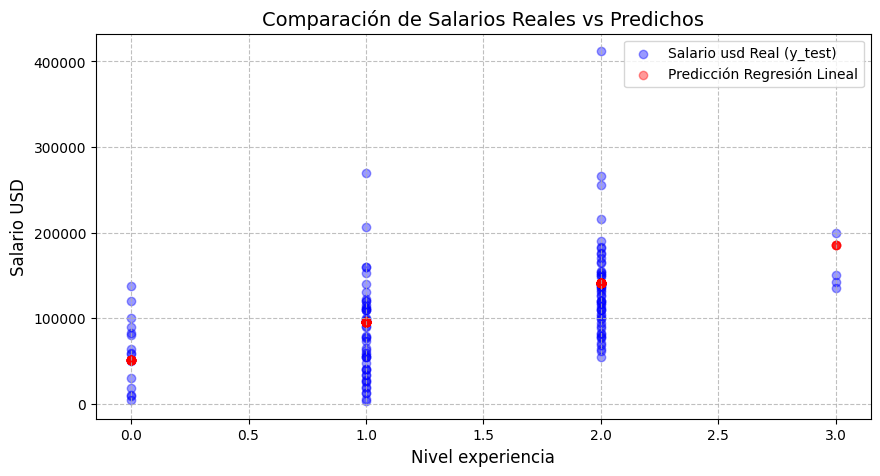

In [8]:
# Crear gráfico de dispersión para comparar valores reales y predicciones
plt.figure(figsize=(10,5 ))

# Graficar valores reales (y_test) en azul
plt.scatter(X_test, y_test, color='blue', label="Salario usd Real (y_test)", alpha=0.4)# alpha puntos transperantes

# Graficar predicciones de Regresión Lineal en rojo
plt.scatter(X_test, y_pred, color='red', label="Predicción Regresión Lineal", alpha=0.4)

# Configurar el gráfico
plt.xlabel("Nivel experiencia", fontsize=12)
plt.ylabel("Salario USD", fontsize=12)
plt.title("Comparación de Salarios Reales vs Predichos", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.8)

# Mostrar gráfico
plt.show()


**Análisis de gráfico**

La gráfica muestra que el modelo de regresión lineal aprende la tendencia general:

“A mayor nivel de experiencia, mayor salario”.

Pero falla en capturar la variabilidad real porque:

1.   Solo usa una variable como input
2. El salario depende de muchos factores no incluidos
3. El modelo es demasiado simple → predice casi promedios
4. El dataset tiene mucha dispersión y outliers

### 1.7 calificar un modelo

**El MAE** mide cuánto se equivoca el modelo en promedio.
Compara el valor real con el valor predicho, calcula la diferencia y la hace positiva (valor absoluto).
Luego saca un promedio de todos esos errores.

**👉 Interpretación**:

MAE pequeño → el modelo se equivoca poco

MAE grande → el modelo se equivoca mucho

🧠 Idea fácil:

Si estás prediciendo salarios, el MAE te dice:
“En promedio, el modelo se equivoca por X dólares.”

**Cómo interpreto mejor el MAE**

**Haciendo uso de la desviación estándar (σ) te dice**:

“Qué tanto se mueven los salarios naturalmente.”

Entonces, si el MAE es más pequeño que esa desviación, significa:

1.  El modelo se equivoca menos de lo que varían los salarios naturalmente
→ Eso es bueno.
2. Sino, El modelo se equivoca más de lo que los salarios varían por sí solos
→ Eso es malo.

**El  R²** mide qué tan bien el modelo logra explicar el comportamiento real de los datos.

Va de:

* 1.0 → modelo perfecto
* 0.0 → el modelo no explica nada
* < 0 → el modelo es peor que adivinar el promedio

**👉 Interpretación sencilla**:

Si obtienes R² = 0.70, significa que:

“El modelo explica el 70% del comportamiento real de los salarios.” Entre más alto sea el R², mejor está funcionando el modelo.

In [9]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
# la desviación de los datos de prueba
desviacion_test = y_test.std()


print(f"Error ABSOLUTO medio (MAE): {mae:.2f}")
print("Desviación estándar del conjunto de prueba:", desviacion_test)
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error ABSOLUTO medio (MAE): 41117.91
Desviación estándar del conjunto de prueba: 62163.038069299255
Coeficiente de determinación (R²): 0.21


 ### 1.8 Interperetación
 * El modelo obtiene un MAE de aproximadamente 41,118 USD. Esto significa que, en promedio, el modelo se equivoca por 41 mil dólares al predecir el salario. Dado que la desviación estándar del conjunto de prueba es de 62,163 USD, el error del modelo es menor que la variación natural de los salarios, por lo que se considera un error razonable para un modelo simple.

* El coeficiente de determinación R² es 0.21, lo que indica que el modelo solo logra explicar el 21% de la variabilidad real del salario. Esto sugiere que el modelo tiene capacidad predictiva limitada y que sería necesario incluir más variables relevantes para mejorar el desempeño.


# 2. Regresión lineal múltiple


In [10]:
#dividir datos
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# elegir modelo
modelo_lr = LinearRegression()
# Entrenar modelos
modelo_lr.fit(X_train, y_train)
# Hacer predicciones
y_pred_lr = modelo_lr.predict(X_test)


# Evaluar modelos
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
std_y_test= y_test.std()

# Mostrar los resultados
print(f"Error ABSOLUTO medio (MAE): {mae:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error ABSOLUTO medio (MAE): 38529.40
Desviación estándar de y_test: 62163.04
Coeficiente de determinación (R²): 0.29


El modelo de regresión lineal múltiple:

1. Mejoró respecto al modelo simple (el R² subió de 0.21 a 0.29)
2. Se equivoca menos que la variación natural del salario (MAE < desviación)
3. Pero sigue siendo un modelo con baja capacidad predictiva
4. Aún le faltan variables importantes para explicar bien los salarios

# 3. Ajustes de data y modelo

### 3.1 Revisar data actual

In [11]:
#abrir data original (revisar nuevas variables que se pueden incluir)
df = pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [12]:
data.columns # revisar composición actual

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_tr',
       'company_size_M', 'company_size_S', 'employment_FL', 'employment_FT',
       'employment_PT'],
      dtype='object')

### 3.2 Incluir nuevas variables

In [13]:
df["company_location"].unique() #sacar val unicos de columna

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [14]:
dummies_cl = pd.get_dummies(df["company_location"], prefix="company_location", drop_first=True).astype(int)
data = pd.concat([data, dummies_cl], axis=1)
data

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S,employment_FL,employment_FT,employment_PT,company_location_AS,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,79833,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,109024,50,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,20000,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,150000,50,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,126000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,129000,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,150000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.3 Gráficar nuevas correlaciones

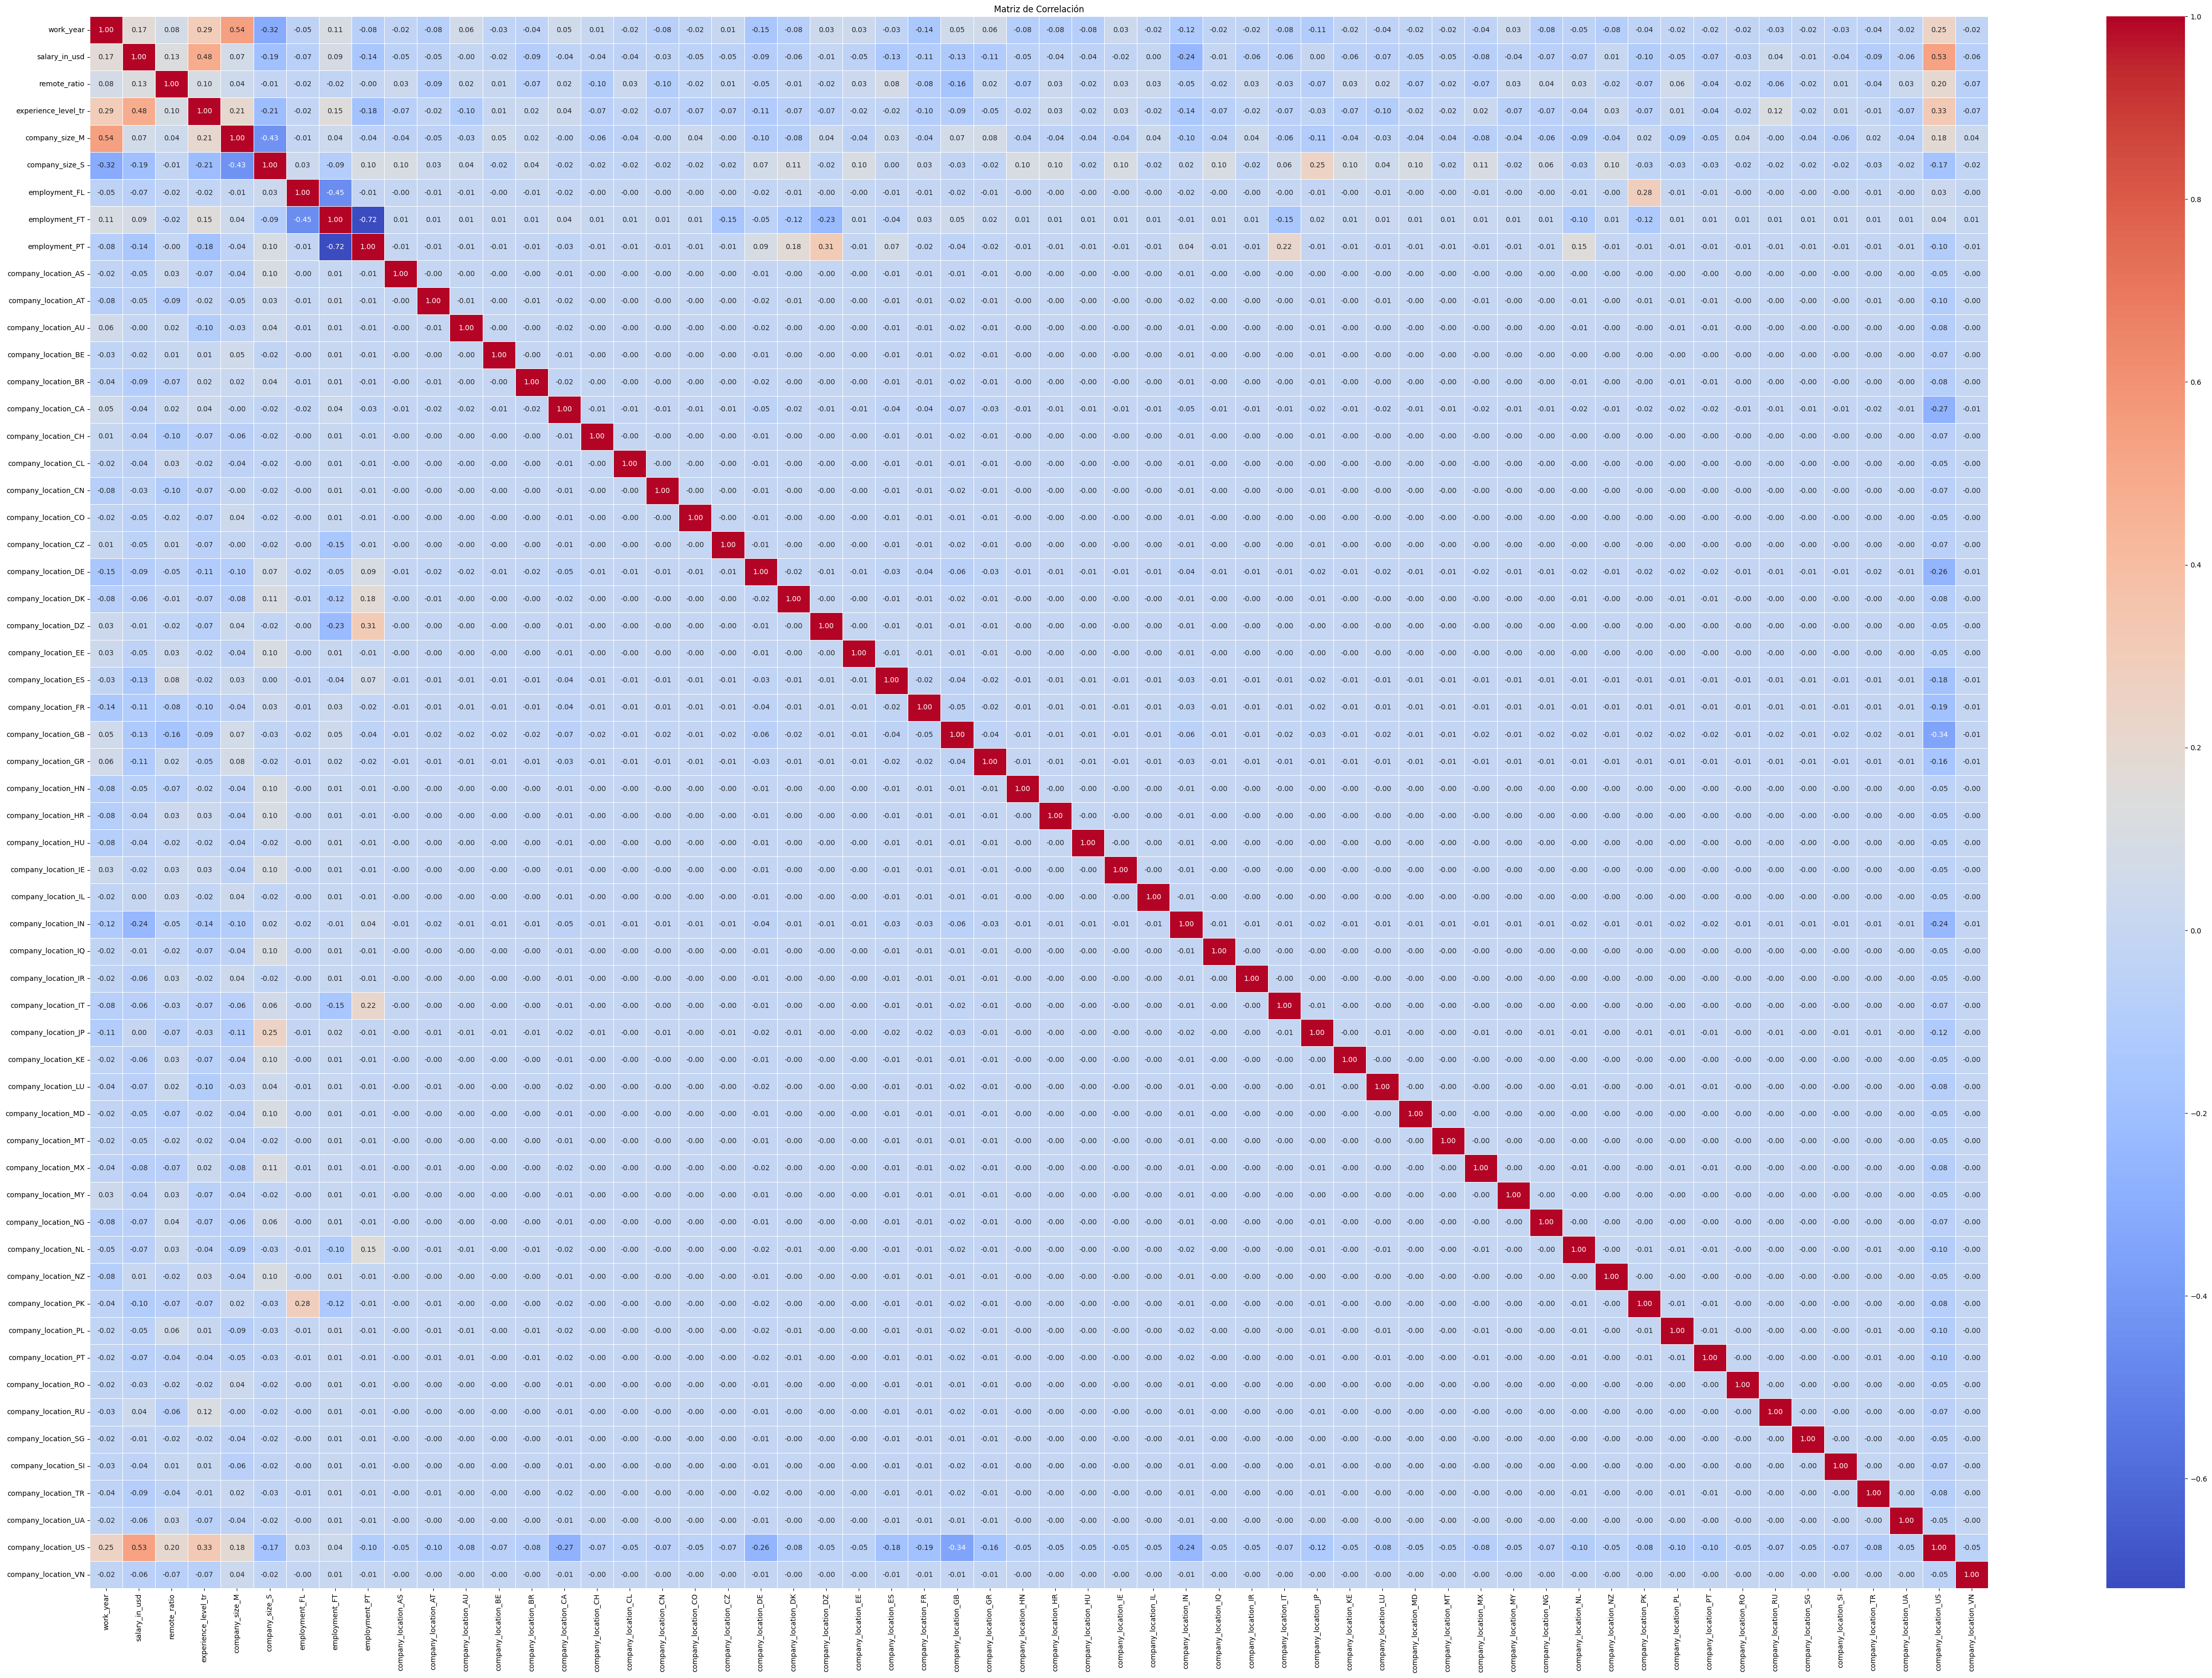

In [15]:
# gráfica
correlacion = data.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(60, 40))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# 🔹 Título del gráfico
plt.title("Matriz de Correlación")
# 🔹 Mostrar el gráfico
plt.show()

### 3.4 Aplicar modelo

In [16]:
data

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S,employment_FL,employment_FT,employment_PT,company_location_AS,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,79833,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,109024,50,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,20000,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,150000,50,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,126000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,129000,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,150000,100,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#dividir datos

X2 = data.drop(columns=['salary_in_usd'])
y2= data['salary_in_usd']
# Dividir en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
# elegir modelo
modelo2 = LinearRegression()
# Entrenar modelos
modelo2.fit(X_train2, y_train2)
# Hacer predicciones
y_pred2 = modelo2.predict(X_test2)

# Evaluar modelos
mae2 = mean_absolute_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
std_y2= y_test2.std()

# Mostrar los resultados
print(f"Error ABSOLUTO medio (MAE): {mae2:.2f}")
print(f"Desviación estándar de y_test: {std_y2:.2f}")
print(f"Coeficiente de determinación (R²): {r2_2:.2f}")

Error ABSOLUTO medio (MAE): 33253.96
Desviación estándar de y_test: 62163.04
Coeficiente de determinación (R²): 0.47


### 3.5 Graficar dispersión

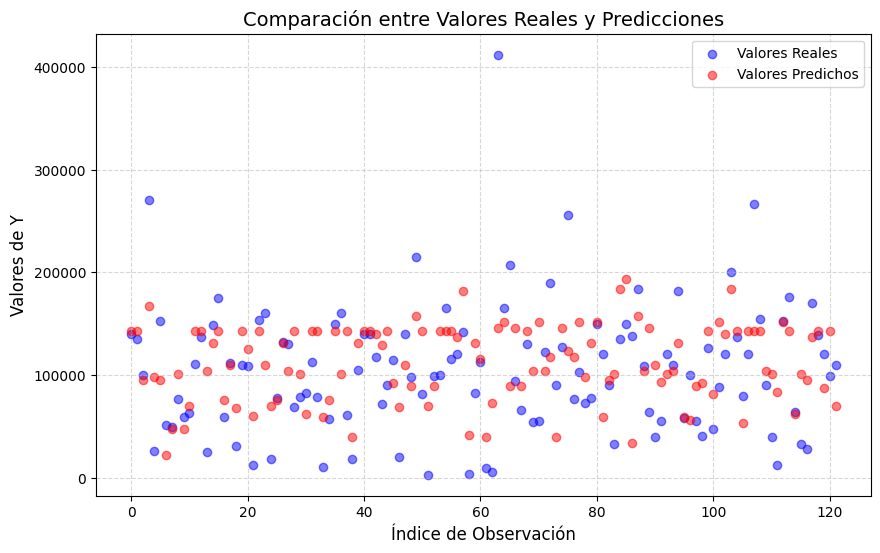

In [18]:
plt.figure(figsize=(10, 6))

# Graficar cada punto (valor real vs predicho)
plt.scatter(range(len(y_test)), y_test, color='blue', label="Valores Reales", alpha=0.5)
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', label="Valores Predichos", alpha=0.5)
# Configurar el gráfico
plt.xlabel("Índice de Observación", fontsize=12)
plt.ylabel("Valores de Y", fontsize=12)
plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
# Mostrar gráfico
plt.show()

### 3.6 Guardar modelo  y data

In [19]:
# Guardar el modelo 1 regresor lineal multiple
joblib.dump(modelo2, '/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_lr_multiple.pkl')

['/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_lr_multiple.pkl']

In [21]:
data.to_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada2_salaries.csv", index=False)  # index=False evita guardar los índices

# 4. Otros modelos

### 4.1 Abrir datas: original y preprocesada.

Agregar nuevas variables

In [22]:
### con el objeto de analizar que hay y que variables se pueden añadir para mejorar la data del modelo

In [23]:
#abrir data real
df = pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [24]:
dummies_employ_residence = pd.get_dummies(df["employee_residence"], prefix="employ_residence", drop_first=True).astype(int)

In [25]:
data= pd.concat([data,dummies_employ_residence], axis=1)


In [26]:
data.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_tr',
       'company_size_M', 'company_size_S', 'employment_FL', 'employment_FT',
       'employment_PT', 'company_location_AS',
       ...
       'employ_residence_RO', 'employ_residence_RS', 'employ_residence_RU',
       'employ_residence_SG', 'employ_residence_SI', 'employ_residence_TN',
       'employ_residence_TR', 'employ_residence_UA', 'employ_residence_US',
       'employ_residence_VN'],
      dtype='object', length=114)

### 4.2 Dividir datas

In [27]:
# Seleccionar la variable independiente (X) y la dependiente (y)
X3 = data.drop(columns=['salary_in_usd'])
y3 = data['salary_in_usd']
# random_state se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


###4.3 Arboles de decisión

In [28]:
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train, y_train)
# Predecir
y_pred_arbol = modelo_arbol.predict(X_test)
# Evaluar
r2_arbol = r2_score(y_test, y_pred_arbol)
mae_arbol = mean_absolute_error(y_test, y_pred_arbol)
print(f"Coeficiente de Determinación (R²): {r2_arbol:.2f}")
print(f"Error ABSOLUTO medio (MAE): {mae_arbol:.2f}")
#

Coeficiente de Determinación (R²): 0.44
Error ABSOLUTO medio (MAE): 32159.64


### 4.4 Random Forest

In [29]:
modelo_rf = RandomForestRegressor(n_estimators=50, max_depth=5,random_state=42)

modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar modelos

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")
print(f"Error ABSOLUTO medio (MAE): {mae_rf:.2f}")


Coeficiente de Determinación (R²): 0.52
Error ABSOLUTO medio (MAE): 30232.86


### 4.5 Guardar data y modelos

In [30]:
joblib.dump(modelo_arbol, '/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_arbol.pkl')
joblib.dump(modelo_rf, '/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_rf.pkl')

['/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_rf.pkl']

In [31]:
data.to_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada3_salaries.csv", index=False)  # index=False evita guardar los índices

# 5. Probando cambios

### 5.1 Cambios de hiperparámetros

In [36]:
# con un ciclo probamos como va cambiando el valor de la profundidad del árbol
for i in range(3,9):
  print("árbol con profundidad ", i)
  modelo_arbol = DecisionTreeRegressor(max_depth = i, random_state=42)
  modelo_arbol.fit(X_train, y_train)
  # Predecir
  y_pred_arbol = modelo_arbol.predict(X_test)
  # Evaluar
  r2_arbol = r2_score(y_test, y_pred_arbol)
  mae_arbol = mean_absolute_error(y_test, y_pred_arbol)
  print(f"Coeficiente de Determinación (R²): {r2_arbol:.2f}")
  print(f"Error ABSOLUTO medio (MAE): {mae_arbol:.2f}")
#

árbol con profundidad  3
Coeficiente de Determinación (R²): 0.48
Error ABSOLUTO medio (MAE): 31712.57
árbol con profundidad  4
Coeficiente de Determinación (R²): 0.44
Error ABSOLUTO medio (MAE): 31577.09
árbol con profundidad  5
Coeficiente de Determinación (R²): 0.48
Error ABSOLUTO medio (MAE): 31416.95
árbol con profundidad  6
Coeficiente de Determinación (R²): 0.52
Error ABSOLUTO medio (MAE): 30128.58
árbol con profundidad  7
Coeficiente de Determinación (R²): 0.53
Error ABSOLUTO medio (MAE): 30871.69
árbol con profundidad  8
Coeficiente de Determinación (R²): 0.50
Error ABSOLUTO medio (MAE): 30970.19


In [39]:
# con un ciclo probamos como nos va cambiando hiperparámetros de prifundidad (depth)
#y número de estimadores (n_estimadores= numero de arboles)
for i in range(2,11):
  print("bosque con profundidad", i, "y ", "numero de estimadores ", i*3)
  modelo_rf = RandomForestRegressor(n_estimators=i*3, max_depth=i,random_state=42)
  modelo_rf.fit(X_train, y_train)
  # Hacer predicciones
  y_pred_rf = modelo_rf.predict(X_test)
  # Evaluar modelos
  r2_rf = r2_score(y_test, y_pred_rf)
  mae_rf = mean_absolute_error(y_test, y_pred_rf)
  print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")
  print(f"Error ABSOLUTO medio (MAE): {mae_rf:.2f}")

bosque con profundidad 2 y  numero de estimadores  6
Coeficiente de Determinación (R²): 0.44
Error ABSOLUTO medio (MAE): 32787.83
bosque con profundidad 3 y  numero de estimadores  9
Coeficiente de Determinación (R²): 0.49
Error ABSOLUTO medio (MAE): 31022.99
bosque con profundidad 4 y  numero de estimadores  12
Coeficiente de Determinación (R²): 0.51
Error ABSOLUTO medio (MAE): 30879.87
bosque con profundidad 5 y  numero de estimadores  15
Coeficiente de Determinación (R²): 0.51
Error ABSOLUTO medio (MAE): 30759.93
bosque con profundidad 6 y  numero de estimadores  18
Coeficiente de Determinación (R²): 0.49
Error ABSOLUTO medio (MAE): 30477.51
bosque con profundidad 7 y  numero de estimadores  21
Coeficiente de Determinación (R²): 0.50
Error ABSOLUTO medio (MAE): 30440.26
bosque con profundidad 8 y  numero de estimadores  24
Coeficiente de Determinación (R²): 0.51
Error ABSOLUTO medio (MAE): 30525.42
bosque con profundidad 9 y  numero de estimadores  27
Coeficiente de Determinación (R

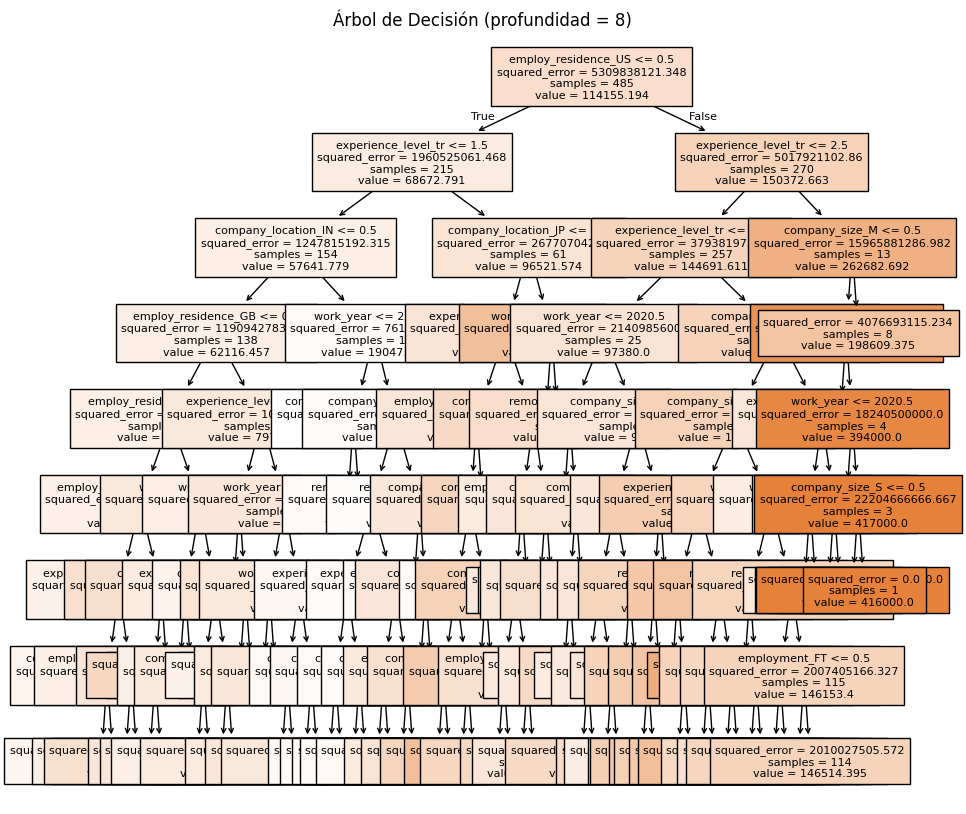

In [41]:
#grafico de un árbol
plt.figure(figsize=(10, 10))  # Tamaño del gráfico
plot_tree(modelo_arbol,
          filled=True,
          feature_names=X3.columns,  # Corregido a X3.columns
          fontsize=8)
plt.title("Árbol de Decisión (profundidad = 8)")
plt.show()

### 5.2 Cambios en atípicos

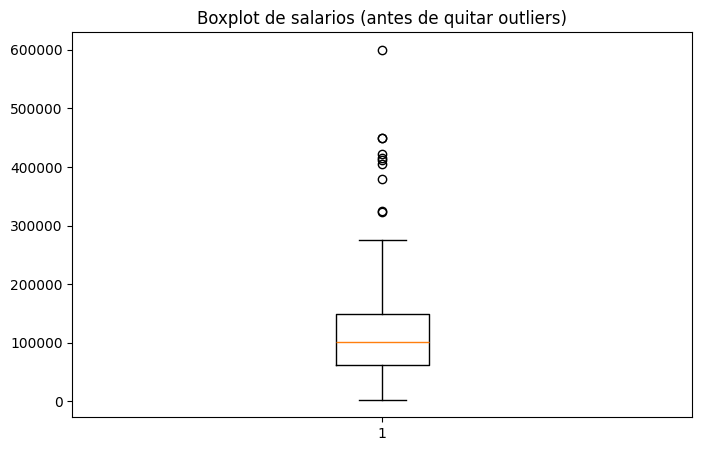

In [43]:
#grafico de cajas en 'salary_in_usd'
plt.figure(figsize=(8,5))
plt.boxplot(data['salary_in_usd'])
plt.title("Boxplot de salarios (antes de quitar outliers)")
plt.show()


In [47]:
# Calcular Q1, Q3 e IQR para salary_in_usd
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

# Filtrar el dataframe quitando atípicos
data_sin_outliers = data[
    (data['salary_in_usd'] >= limite_inferior) &
    (data['salary_in_usd'] <= limite_superior)
].copy()

print("Antes:", data.shape)
print("Después:", data_sin_outliers.shape)


Límite inferior: -68185.0
Límite superior: 280911.0
Antes: (607, 114)
Después: (597, 114)


#### 5.2.1 Probando cambios en los modelos

In [48]:
# de regresión lineal
#dividir datos
X = data_sin_outliers.drop(columns=['salary_in_usd'])
y = data_sin_outliers['salary_in_usd']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# elegir modelo
modelo_lr = LinearRegression()
# Entrenar modelos
modelo_lr.fit(X_train, y_train)
# Hacer predicciones
y_pred_lr = modelo_lr.predict(X_test)

# Evaluar modelos
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
std_y_test= y_test.std()

# Mostrar los resultados
print(f"Error ABSOLUTO medio (MAE): {mae:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error ABSOLUTO medio (MAE): 32062.53
Desviación estándar de y_test: 51826.73
Coeficiente de determinación (R²): 0.40


In [49]:
#de arbol de decisiones
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train, y_train)
# Predecir
y_pred_arbol = modelo_arbol.predict(X_test)
# Evaluar
r2_arbol = r2_score(y_test, y_pred_arbol)
mae_arbol = mean_absolute_error(y_test, y_pred_arbol)
print(f"Coeficiente de Determinación (R²): {r2_arbol:.2f}")
print(f"Error ABSOLUTO medio (MAE): {mae_arbol:.2f}")

Coeficiente de Determinación (R²): 0.23
Error ABSOLUTO medio (MAE): 34172.78


In [50]:
# de random forest
modelo_rf = RandomForestRegressor(n_estimators=50, max_depth=5,random_state=42)

modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar modelos

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")
print(f"Error ABSOLUTO medio (MAE): {mae_rf:.2f}")


Coeficiente de Determinación (R²): 0.47
Error ABSOLUTO medio (MAE): 30528.72


#### 5.2.1 Conclusión de atípicos

En este dataset, los outliers no son errores sino sueldos reales que representan la realidad del mercado laboral.
Cuando los quité, los modelos perdieron la información necesaria para distinguir entre regiones, roles y niveles de experiencia.
Por eso los árboles y Random Forest funcionaron peor después de eliminar los valores extremos.

# Underfitting y Overfitting
Cuando entrenamos un modelo de Machine Learning, queremos que aprenda patrones reales de los datos para predecir bien en nuevos casos. Sin embargo, a veces el modelo aprende demasiado poco… o demasiado.
A esto se le llama **underfitting y overfitting.**

---

# 🟥 **Underfitting (cuando el modelo aprende muy poco)**

El modelo es **demasiado simple** y no logra captar la relación entre las variables.

### ✔️ ¿Cómo se detecta?

* Error alto en entrenamiento
* Error alto en prueba
* R² bajo tanto en train como en test
* Predicciones muy pobres

### ✔️ ¿Por qué ocurre?

* Modelo muy simple
* Muy pocas variables
* Falta de información
* Muestreos muy reducidos

### ✔️ ¿Cómo evitarlo?

* Usar un modelo más complejo (árboles, Random Forest, Gradient Boosting)
* Agregar variables relevantes (feature engineering)
* Quitar columnas irrelevantes
* Revisar si hay errores en la data

---

# 🟦 **Overfitting (cuando el modelo aprende demasiado)**

El modelo se vuelve **demasiado complejo** y memoriza el dataset de entrenamiento.
Funciona muy bien en train, pero muy mal en prueba.

### ✔️ ¿Cómo se detecta?

* R² muy alto en entrenamiento
* R² mucho más bajo en prueba
* MAE train muy bajo
* MAE test mucho más alto
* Diferencia grande entre train y test

### ✔️ ¿Por qué ocurre?

* Árboles muy profundos
* Modelos muy complejos
* Muchas variables o demasiados dummies
* Poca información pero modelo muy flexible

### ✔️ ¿Cómo evitarlo?

* Limitar la complejidad del modelo:

  * `max_depth` en árboles
  * `n_estimators` adecuados en Random Forest
  * `min_samples_split` y `min_samples_leaf` más altos
* Simplificar variables categóricas
* Quitar ruido en los datos
* Separar train/test correctamente

---

# 🟩 **¿Qué buscamos entonces?**

Un modelo que:

* Aprenda lo necesario
* No memorice
* Ni se quede corto

Es decir, un modelo que tenga **rendimiento similar en entrenamiento y en prueba**.

---

# ⭐ **Regla de oro para detectarlo**

| Situación | Train    | Test                  | Diagnóstico |
| --------- | -------- | --------------------- | ----------- |
| Bajo      | Bajo     | ❗ Underfitting        |             |
| Alto      | Bajo     | ❗ Overfitting         |             |
| Parecido  | Parecido | ✔️ Modelo equilibrado |             |

---
.


In [54]:
# Lista de (nombre_para_mostrar, ruta_del_modelo)
modelos_guardados = [
    ("Árbol de Decisión", '/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_arbol.pkl'),
    ("Random Forest",'/content/drive/MyDrive/CODIGOS _ia/modelos/modelo_rf.pkl' )
]

#ABRIR DATA CON LA QUE FUE ENTRENADO EL MODELO
data= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada3_salaries.csv")
#PARTIR
# Seleccionar la variable independiente (X) y la dependiente (y)
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']
# random_state se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for nombre, ruta in modelos_guardados:
    print(f"🔹 Modelo: {nombre}")

    # 1. Cargar el modelo
    modelo = joblib.load(ruta)

    # 2. Predicciones en train y test
    y_pred_train = modelo.predict(X_train)
    y_pred_test  = modelo.predict(X_test)

    # 3. Métricas en train
    r2_train  = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    # 4. Métricas en test
    r2_test  = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # 5. Imprimir resultados
    print(f"  R² train: {r2_train:.4f}")
    print(f"  R² test : {r2_test:.4f}")
    print(f"  MAE train: {mae_train:,.2f}")
    print(f"  MAE test : {mae_test:,.2f}")

    # 6. Diagnóstico rápido
    if r2_train < 0.3 and r2_test < 0.3:
        print("  👉 Parece underfitting (modelo demasiado simple).")
    elif r2_train - r2_test > 0.2:
        print("  👉 Posible overfitting (muy bueno en train, peor en test).")
    else:
        print("  ✅ Generaliza razonablemente bien.")

    print("-"*60)


🔹 Modelo: Árbol de Decisión
  R² train: 0.6871
  R² test : 0.4398
  MAE train: 22,440.85
  MAE test : 32,159.64
  👉 Posible overfitting (muy bueno en train, peor en test).
------------------------------------------------------------
🔹 Modelo: Random Forest
  R² train: 0.5707
  R² test : 0.5241
  MAE train: 32,788.22
  MAE test : 30,232.86
  ✅ Generaliza razonablemente bien.
------------------------------------------------------------


Entrenamos dos modelos con el mismo dataset: un árbol de decisión y un Random Forest.

El árbol de decisión obtuvo un desempeño muy alto en entrenamiento, pero muy bajo en prueba.
Esto significa que se sobreajustó: aprendió demasiado los datos que ya conocía, pero no logró generalizar a casos nuevos.

En cambio, el Random Forest combinó muchos árboles más simples y obtuvo resultados muy parecidos en entrenamiento y prueba.
Esto muestra que generaliza mejor, y por lo tanto es un modelo más estable y confiable.

Esta comparación nos enseña cuándo un modelo está en overfitting, en underfitting o en un punto óptimo.

#  **Conclusión Final del Ejercicio de Predicción de Salarios**
----
En este proyecto realizamos un proceso completo de predicción de salarios utilizando tres modelos distintos: **Regresión Lineal**, **Árbol de Decisión** y **Random Forest**. Esto nos permitió comparar cómo se comportan diferentes tipos de algoritmos frente al mismo problema y qué tan bien logran generalizar a datos nuevos.

### 🔹 **Regresión Lineal**

La regresión lineal sirvió como un modelo base. Su desempeño fue limitado en comparación con los modelos basados en árboles, especialmente porque este tipo de modelo solo captura relaciones lineales entre las variables. Sin embargo, fue útil para mostrar un enfoque clásico, interpretar coeficientes y entender cómo se comportan los datos cuando se asume linealidad.
Este modelo nos permitió observar que, en problemas con muchas variables categóricas, relaciones no lineales y alta variabilidad (como los salarios en tecnología), la regresión puede quedarse corta.

### 🔹 **Árbol de Decisión**

El árbol de decisión mostró un rendimiento alto en el conjunto de entrenamiento, pero mucho más bajo en el conjunto de prueba. Esto revela un caso claro de **overfitting**: el modelo aprendió demasiado los detalles del dataset de entrenamiento, incluso el ruido, pero no logró generalizar bien a datos nuevos.
Este comportamiento nos enseña que un modelo más complejo no necesariamente es mejor si no controla adecuadamente la profundidad o la cantidad de divisiones.

### 🔹 **Random Forest**

El Random Forest presentó el comportamiento más estable: sus métricas de entrenamiento y prueba fueron similares, con un nivel de error más bajo y un R² más equilibrado. Esto demuestra que el modelo **generaliza mejor**, gracias a que combina muchos árboles simples y reduce el riesgo de sobreajustar.
Por esta razón, fue el modelo más robusto en este ejercicio.

---

# ⭐ **¿Qué aprendimos?**

* El mejor modelo no es el que obtiene el mayor rendimiento en entrenamiento, sino el que predice bien en datos nuevos.
* Mantener los *outliers* en este dataset fue correcto, porque representan salarios reales y ayudan a capturar mejor la variabilidad del mercado laboral.
* La comparación entre modelos permite identificar casos de **underfitting** (modelo demasiado simple) y **overfitting** (modelo demasiado complejo).
* La Regresión Lineal, aunque sencilla, sirve como punto de partida y referencia, pero los modelos basados en árboles suelen capturar mejor patrones complejos.
* El Random Forest resultó ser el modelo con mejor equilibrio entre aprendizaje y generalización.

---

# 🎯 **Cierre**

Este ejercicio refleja la práctica real del Machine Learning: experimentar, comparar y entender las limitaciones de cada algoritmo. Más allá de obtener un número perfecto, el objetivo es construir un modelo que **aprenda los patrones reales de los datos y sea capaz de generalizar**, tal como lo hizo el Random Forest en este caso.
